<a href="https://colab.research.google.com/github/sisifo3/P_T_4/blob/main/subFunctionGUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

In [3]:
date_rng = pd.date_range(start='01/01/2017', end='01/01/2022', freq='H')


In [4]:
print(len(date_rng))
print(date_rng)

43825
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2021-12-31 15:00:00', '2021-12-31 16:00:00',
               '2021-12-31 17:00:00', '2021-12-31 18:00:00',
               '2021-12-31 19:00:00', '2021-12-31 20:00:00',
               '2021-12-31 21:00:00', '2021-12-31 22:00:00',
               '2021-12-31 23:00:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', length=43825, freq='H')


In [5]:
time_str = []
for i,(val)in enumerate(date_rng):
  x = str(val).split(" ")
  time_str.append(x[1])


In [6]:
change_format = date_rng.strftime('%d/%m/%Y')
print(change_format)

Index(['01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017',
       '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017',
       ...
       '31/12/2021', '31/12/2021', '31/12/2021', '31/12/2021', '31/12/2021',
       '31/12/2021', '31/12/2021', '31/12/2021', '31/12/2021', '01/01/2022'],
      dtype='object', length=43825)


In [7]:
df = pd.DataFrame(change_format)
df.head()

,0
0,01/01/2017
1,01/01/2017
2,01/01/2017
3,01/01/2017
4,01/01/2017


In [8]:
df.insert(1,'time',time_str)
df.head()

,0,time
0,01/01/2017,00:00:00
1,01/01/2017,01:00:00
2,01/01/2017,02:00:00
3,01/01/2017,03:00:00
4,01/01/2017,04:00:00


In [9]:
zone = [1]* 43825
print(len(zone)) 
df.insert(2,'zone',zone)

43825


In [10]:
import random
import numpy as np

sitting_people = [2]
standing_people = [4]
for i in range(43824): sitting_people = np.vstack([sitting_people, random.sample(range(0,14), 1) ])
for i in range(43824): standing_people = np.vstack([standing_people, random.sample(range(0,14), 1) ])


In [11]:
df.insert(3,'sitting_people',sitting_people)
df.insert(4,'standing_people',standing_people)

In [12]:
df.head()

,0,time,zone,sitting_people,standing_people
0,01/01/2017,00:00:00,1,2,4
1,01/01/2017,01:00:00,1,13,1
2,01/01/2017,02:00:00,1,3,1
3,01/01/2017,03:00:00,1,0,0
4,01/01/2017,04:00:00,1,5,1


In [13]:
df.columns = ['date', 'time','zone', 'sitting_people', 'standing_people']


In [14]:
df.head()

,date,time,zone,sitting_people,standing_people
0,01/01/2017,00:00:00,1,2,4
1,01/01/2017,01:00:00,1,13,1
2,01/01/2017,02:00:00,1,3,1
3,01/01/2017,03:00:00,1,0,0
4,01/01/2017,04:00:00,1,5,1


In [15]:
df.to_csv("sintetic_data_v3_zone_1.csv")

In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
from datetime import date, timedelta   

date_t = "15/02/2020"
time_tl = "06:00:00"
time_tu = "22:00:00"

total_seat = 20

data = {'date' : [date_t]}
df2 = pd.DataFrame(data)
df2['date'] = pd.to_datetime(df2['date'], format='%d/%m/%Y')


filename = '/content/synthetic_data_v3_zone_1.csv'
df = pd.read_csv(filename)
relevant_cols = ['date','time','zone','sitting_people','standing_people']
df = df[relevant_cols]


for i in range(5):
  i = i + 1
  day_prior =  df2['date'][0] + timedelta(days=i)
  df2.loc[len(df2.index)] = day_prior

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df2['date'] = pd.to_datetime(df2['date'], format='%d/%m/%Y')
#print(df2)

q = []


for i in range(len(df2)):
  df3 = df[(df['date'] == df2['date'][i]) & ((df['time'] >= time_tl) & (df['time'] <= time_tu))]
  porc_d = (df3['sitting_people']/total_seat)*100

  p = []  
  for j, (val) in enumerate(porc_d):p.append(val)

  q.append(p)  

print(q)

[[50.0, 30.0, 5.0, 35.0, 0.0, 0.0, 10.0, 20.0, 20.0, 65.0, 30.0, 55.00000000000001, 65.0, 25.0, 40.0, 30.0, 5.0], [45.0, 55.00000000000001, 0.0, 25.0, 0.0, 45.0, 5.0, 25.0, 50.0, 15.0, 5.0, 0.0, 30.0, 50.0, 10.0, 35.0, 25.0], [45.0, 60.0, 50.0, 45.0, 55.00000000000001, 55.00000000000001, 5.0, 55.00000000000001, 50.0, 5.0, 45.0, 0.0, 45.0, 40.0, 45.0, 45.0, 5.0], [50.0, 60.0, 10.0, 60.0, 30.0, 0.0, 35.0, 0.0, 30.0, 50.0, 50.0, 5.0, 50.0, 45.0, 60.0, 15.0, 15.0], [25.0, 65.0, 30.0, 60.0, 60.0, 15.0, 50.0, 55.00000000000001, 35.0, 60.0, 35.0, 35.0, 5.0, 45.0, 20.0, 0.0, 55.00000000000001], [60.0, 55.00000000000001, 5.0, 60.0, 50.0, 45.0, 20.0, 0.0, 10.0, 25.0, 15.0, 20.0, 65.0, 50.0, 45.0, 20.0, 0.0]]


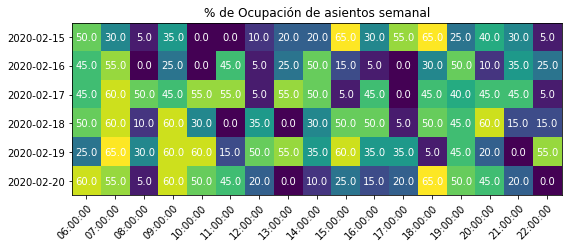

In [77]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

harvest = np.asarray(q)
harvest = np.floor(harvest)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)) )

int_x = []
for val in df2['date']:
  x = str(val).split(" ")
  int_x.append(x[0])

ax.set_xticklabels(labels=df3['time'])
ax.set_yticks(np.arange(len(vegetables)))
ax.set_yticklabels(labels=int_x)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("% de Ocupación de asientos semanal")
fig.tight_layout()
plt.show()


In [74]:
for val in df2['date']:
  #print(val)
  x = str(val).split(" ")
  #print(x)
  
  int_x.append(x[0])

print(int)

2020-02-15 00:00:00
['2020-02-15', '00:00:00']
2020-02-16 00:00:00
['2020-02-16', '00:00:00']
2020-02-17 00:00:00
['2020-02-17', '00:00:00']
2020-02-18 00:00:00
['2020-02-18', '00:00:00']
2020-02-19 00:00:00
['2020-02-19', '00:00:00']
2020-02-20 00:00:00
['2020-02-20', '00:00:00']
